# Imports:

In [1]:
import numpy as np       #Linear Algebra
import pandas as pd      #data processing

import seaborn as sns     #Data Visualization
import matplotlib.pyplot as plt
import plotly.express as px


import warnings
warnings.filterwarnings("ignore") #to ignore the warnings

#for model building
from sklearn.metrics import f1_score, precision_score, accuracy_score, recall_score, balanced_accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.naive_bayes import GaussianNB


# Exploratory Data Analysis (EDA):

<h2>Data Collection:</h2>

In [2]:
# Loading the data

df = pd.read_csv('data/data.csv')

In [3]:
df.head()


id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0  ...         25.38          17.33           184.60      2019.0   
1  ...         24.99          23.41           158.80      1956.0   
2  ...         23.57          25.53           152.50      1709.0   
3  ...         14.91          26.50            98.87       567.7   
4  ...         22.54          16.67           152.20      1575.0   

   smoothness_worst  compactness_worst  concavity_worst  concave points_worst  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   symmetry_worst  fractal_dimension_worst  
0          0.4601                  0.11890  
1          0.2750                  0.08902  
2          0.3613                  0.08758  
3          0.6638                  0.17300  
4          0.2364                  0.07678  

[5 rows x 32 columns]

In [4]:
print(80 * "*")
print('DIMENSION: ({}, {})'.format(df.shape[0], df.shape[1]))
print(80 * "*")

********************************************************************************
DIMENSION: (569, 32)
********************************************************************************


In [5]:
print("COLUMNS:\n")
print(df.columns.values)
print(80 * "*")

COLUMNS:

['id' 'diagnosis' 'radius_mean' 'texture_mean' 'perimeter_mean'
 'area_mean' 'smoothness_mean' 'compactness_mean' 'concavity_mean'
 'concave points_mean' 'symmetry_mean' 'fractal_dimension_mean'
 'radius_se' 'texture_se' 'perimeter_se' 'area_se' 'smoothness_se'
 'compactness_se' 'concavity_se' 'concave points_se' 'symmetry_se'
 'fractal_dimension_se' 'radius_worst' 'texture_worst' 'perimeter_worst'
 'area_worst' 'smoothness_worst' 'compactness_worst' 'concavity_worst'
 'concave points_worst' 'symmetry_worst' 'fractal_dimension_worst']
********************************************************************************


In [6]:
print("DATA INFO:\n")
print(df.dtypes)
print(80 * "*")

DATA INFO:

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavit

In [7]:
print("MISSING VALUES:\n")
print(df.isnull().sum())
print(80 * "*")

MISSING VALUES:

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64
******************************************

In [8]:
print("NUMBER OF UNIQUE VALUES:\n")
print(df.nunique())

NUMBER OF UNIQUE VALUES:

id                         569
diagnosis                    2
radius_mean                456
texture_mean               479
perimeter_mean             522
area_mean                  539
smoothness_mean            474
compactness_mean           537
concavity_mean             537
concave points_mean        542
symmetry_mean              432
fractal_dimension_mean     499
radius_se                  540
texture_se                 519
perimeter_se               533
area_se                    528
smoothness_se              547
compactness_se             541
concavity_se               533
concave points_se          507
symmetry_se                498
fractal_dimension_se       545
radius_worst               457
texture_worst              511
perimeter_worst            514
area_worst                 544
smoothness_worst           411
compactness_worst          529
concavity_worst            539
concave points_worst       492
symmetry_worst             500
fractal_dimen

<h2>Data Analysis:</h2>

In [9]:
df.describe().T.style.background_gradient(cmap = sns.color_palette("ch:s=-.2,r=.6", as_cmap=True))

In [10]:
px.histogram(data_frame=df, x='diagnosis', color='diagnosis',color_discrete_sequence=['#A865C9','#f6abb6'])

In [11]:
px.histogram(data_frame=df,x=df.area_mean,color='diagnosis',color_discrete_sequence=['#A865C9','#f6abb6'])

In [12]:
px.histogram(data_frame=df,x='radius_mean',color='diagnosis',color_discrete_sequence=['#A865C9','#f6abb6'])

In [13]:
px.histogram(data_frame=df,x='perimeter_mean',color='diagnosis',color_discrete_sequence=['#A865C9','#f6abb6'])

In [14]:
px.histogram(data_frame=df,x='smoothness_mean',color='diagnosis',color_discrete_sequence=['#A865C9','#f6abb6'])

In [15]:
px.histogram(data_frame=df,x='texture_mean',color='diagnosis',color_discrete_sequence=['#A865C9','#f6abb6'])

In [16]:
px.scatter(data_frame=df,x='symmetry_worst',color='diagnosis',color_discrete_sequence=['#A865C9','#f6abb6'])

In [17]:
px.scatter(data_frame=df,x='concavity_worst',color='diagnosis',color_discrete_sequence=['#A865C9','#f6abb6'])

In [18]:
px.scatter(data_frame=df,x='fractal_dimension_worst',color='diagnosis',color_discrete_sequence=['#A865C9','#f6abb6'])

<h2>Data Preprocessing:</h2>

In [19]:
missing_values = ["compactness_mean", "concavity_mean", "concave points_mean", "concavity_se", "concave points_se", "concavity_worst","concave points_worst"]
df[missing_values] = np.where(df[missing_values] == 0, np.nan, df[missing_values])

In [20]:
import missingno as msno

<Axes: >

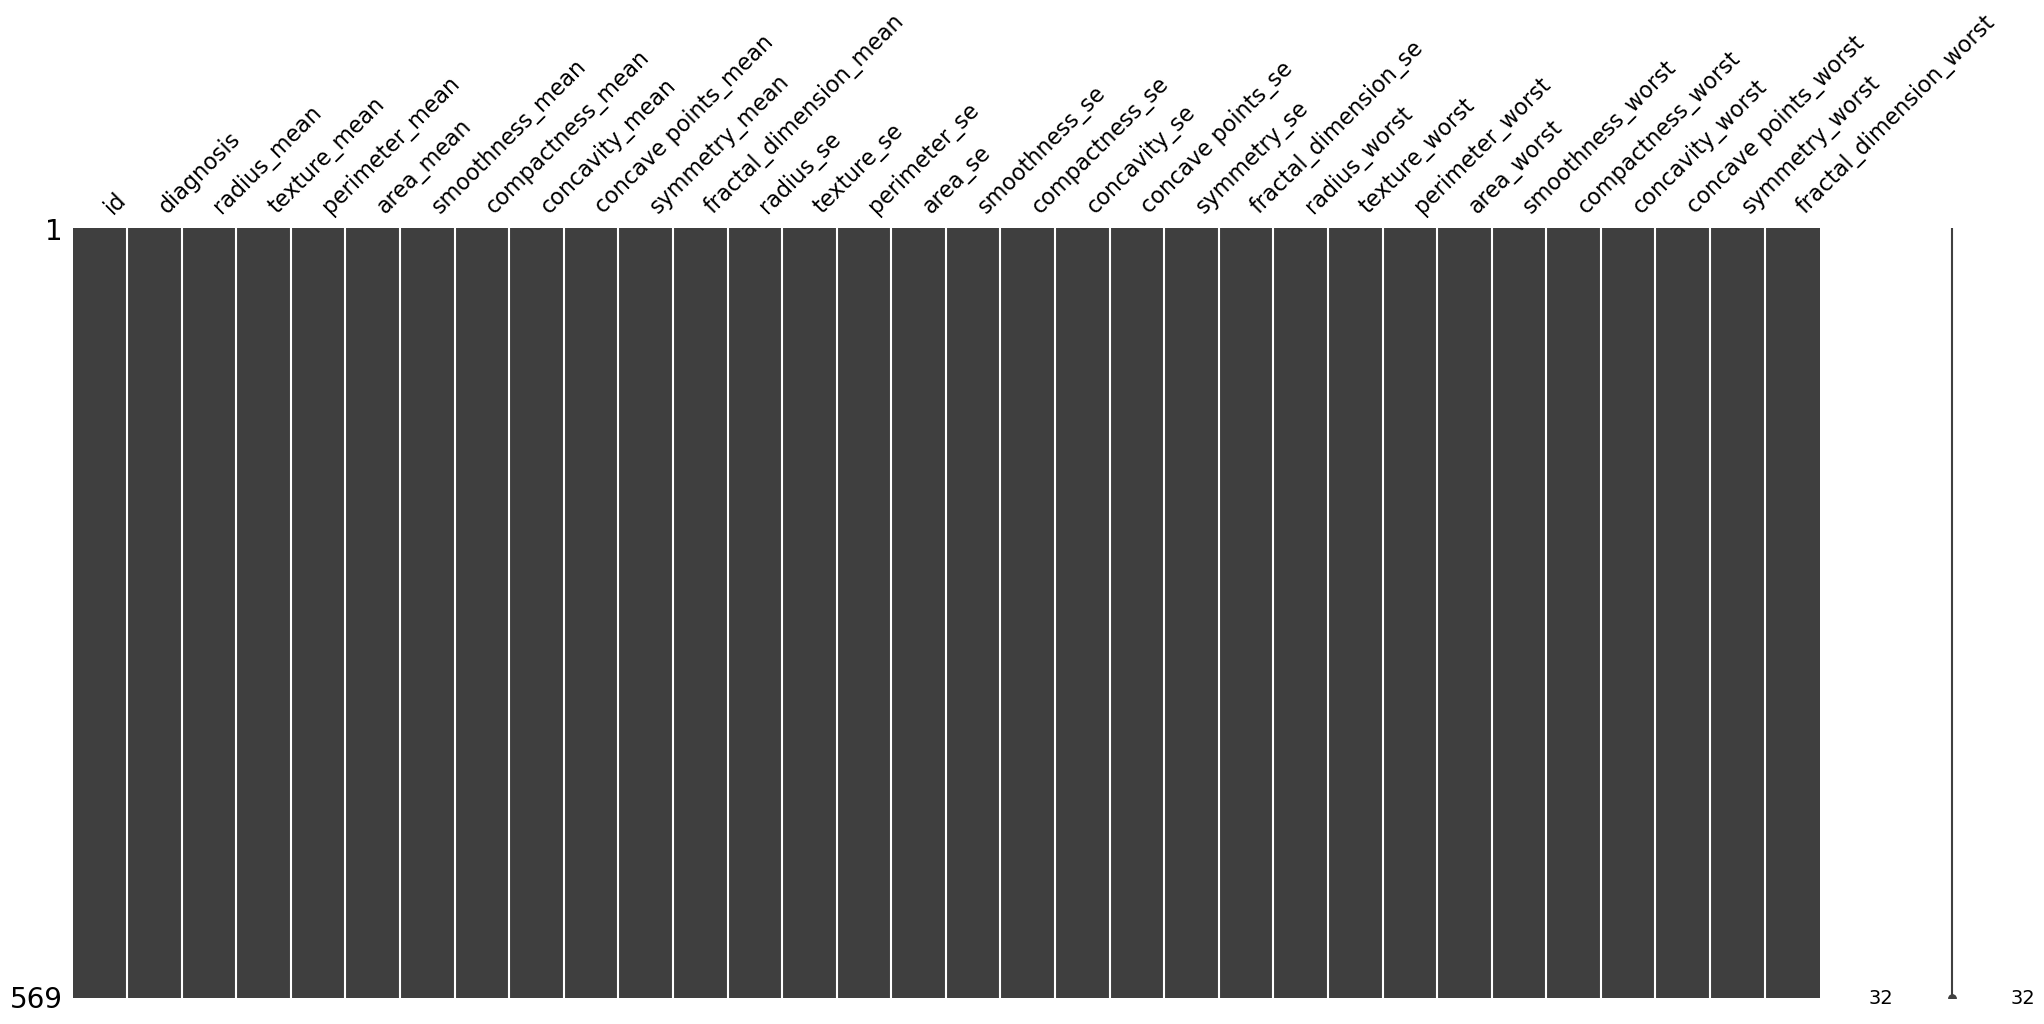

In [21]:
msno.matrix(df)

In [22]:
def missing_percentage(df):
    total = df.isnull().sum().sort_values(ascending = False)[df.isnull().sum().sort_values(ascending = False) != 0]
    percent = round(df.isnull().sum().sort_values(ascending = False)/len(df)*100,2)[round(df.isnull().sum().sort_values(ascending = False)/len(df)*100,2) != 0]
    return pd.concat([total, percent], axis=1, keys=['Total','Percent'])

In [23]:
missing_percentage(df)

Empty DataFrame
Columns: [Total, Percent]
Index: []

In [24]:
df = df.drop(['id'], axis=1)

In [25]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [26]:
# Encode the diagnosis variable
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 2})

In [27]:
df.diagnosis.unique()

array([1, 2], dtype=int64)

Text(0.5, 1.0, 'Correlation Map')

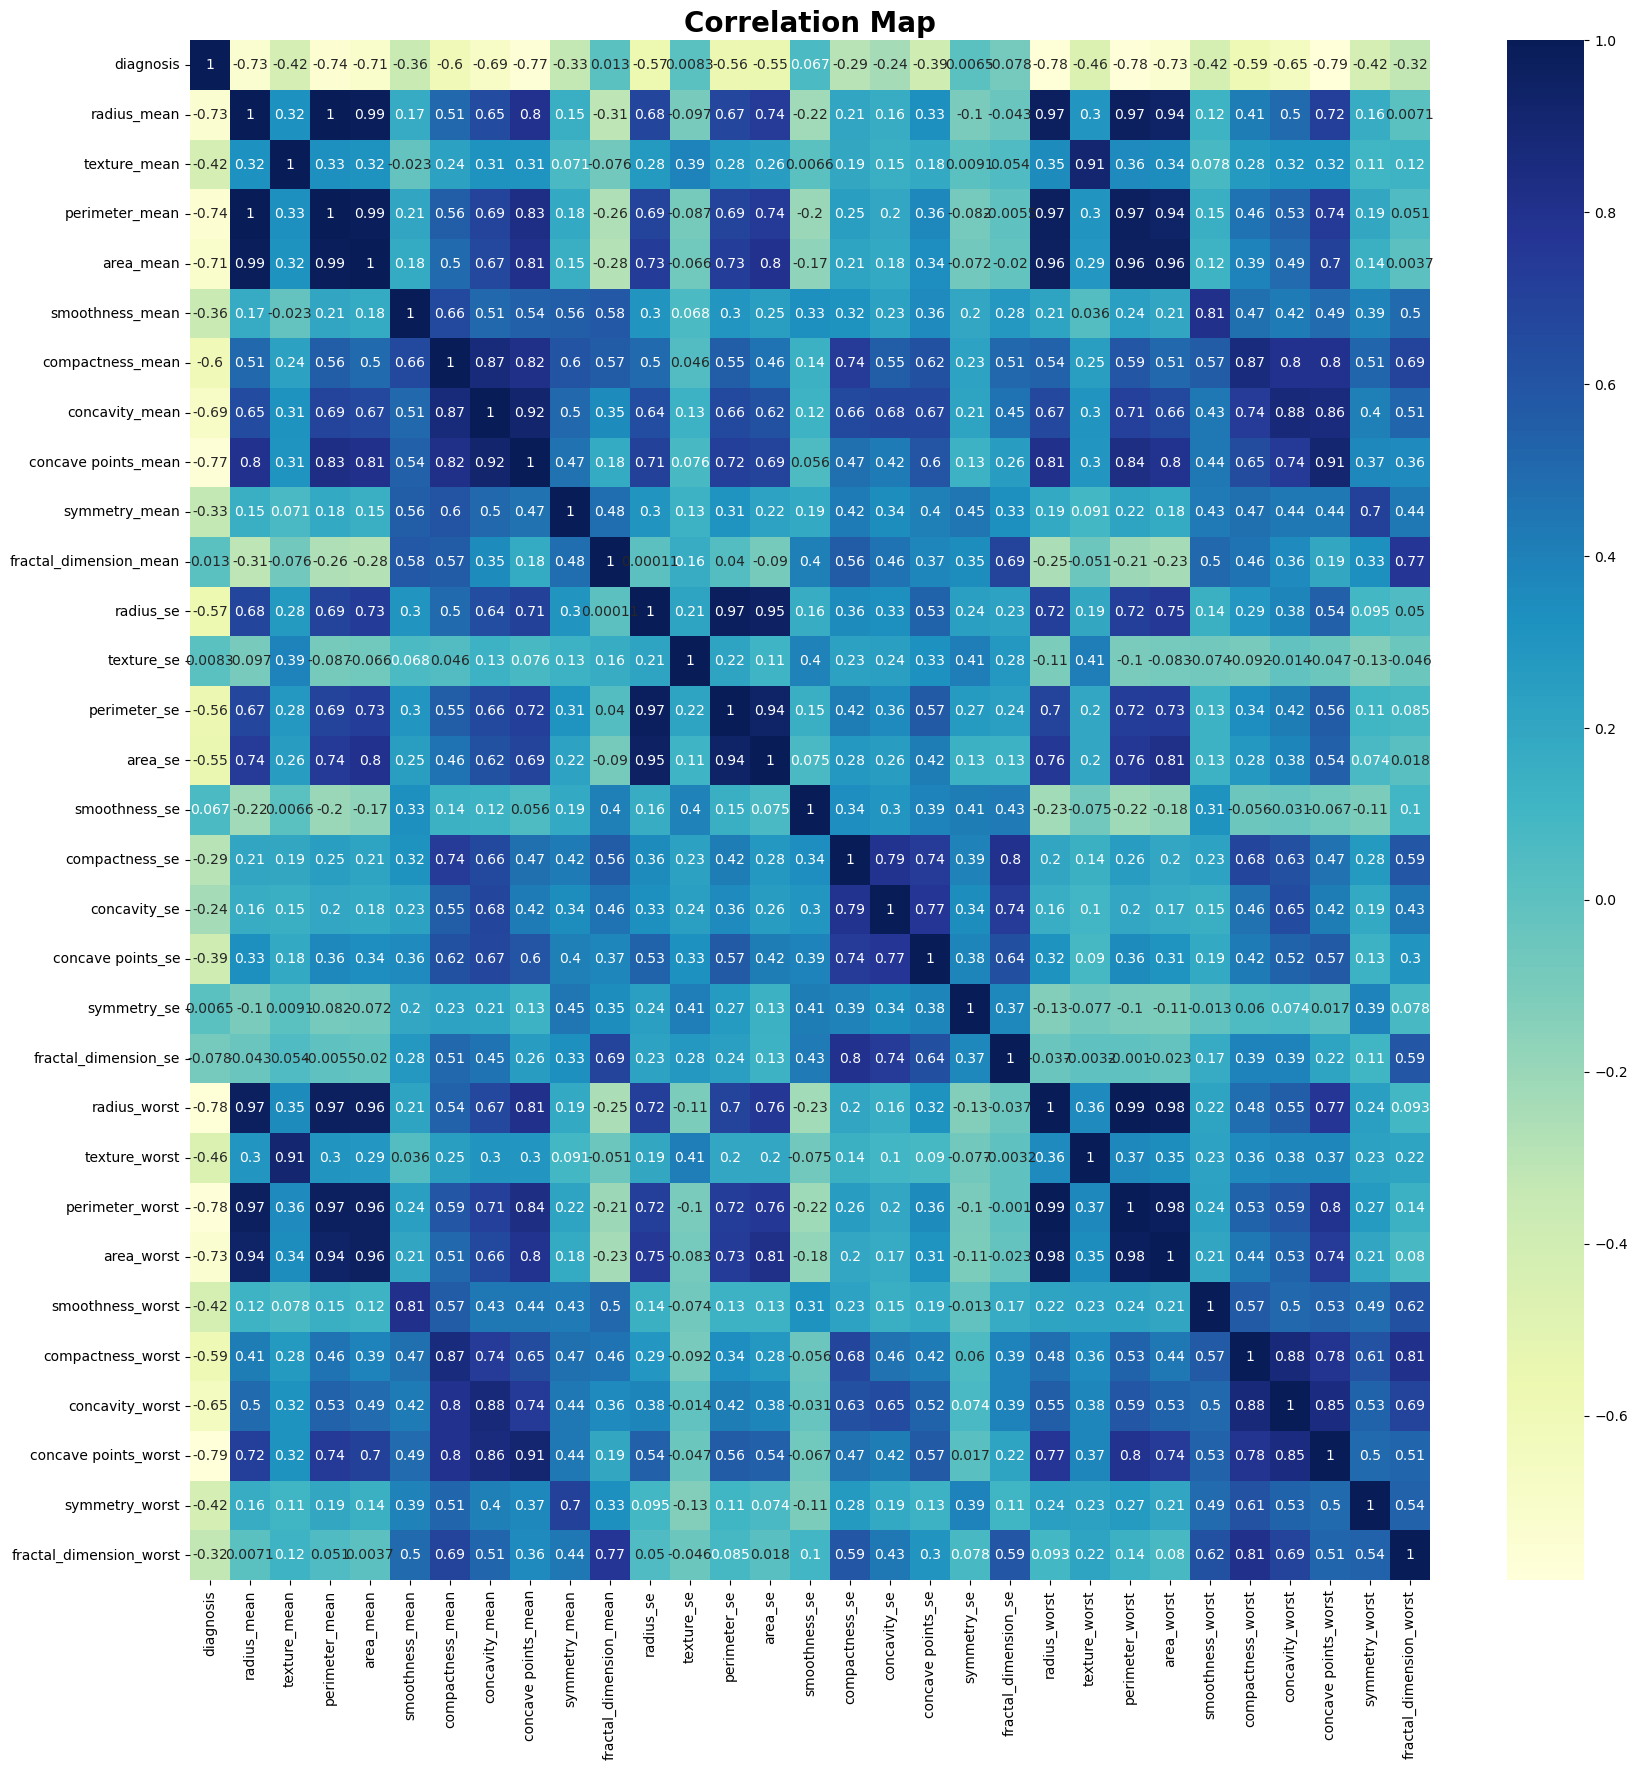

In [28]:
corr = df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), cmap='YlGnBu', annot = True)
plt.title("Correlation Map", fontweight = "bold", fontsize=20)

<h3><i>We have to select which of the attributes we want to use in building our model:</i></h3>

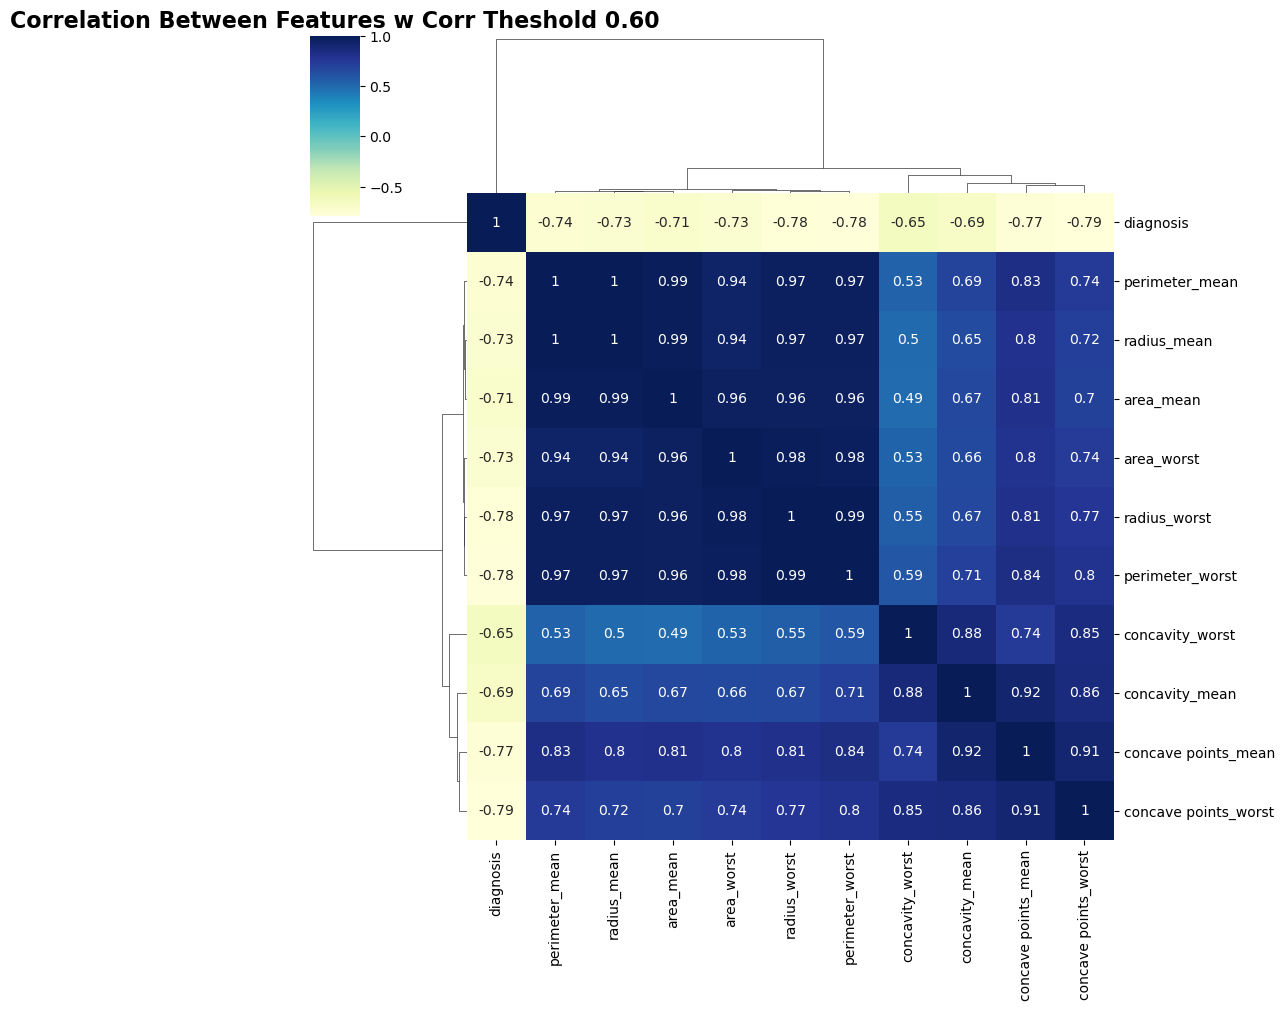

In [29]:

corr_matrix = df.corr()
threshold = 0.60 
filtre = np.abs(corr_matrix["diagnosis"]) > threshold
corr_features = corr_matrix.columns[filtre].tolist()
sns.clustermap(df[corr_features].corr(), annot = True, cmap="YlGnBu")
plt.title("Correlation Between Features w Corr Theshold 0.60", fontweight = "bold", fontsize=16)
plt.show()


<h2>Pair Plot:</h2>

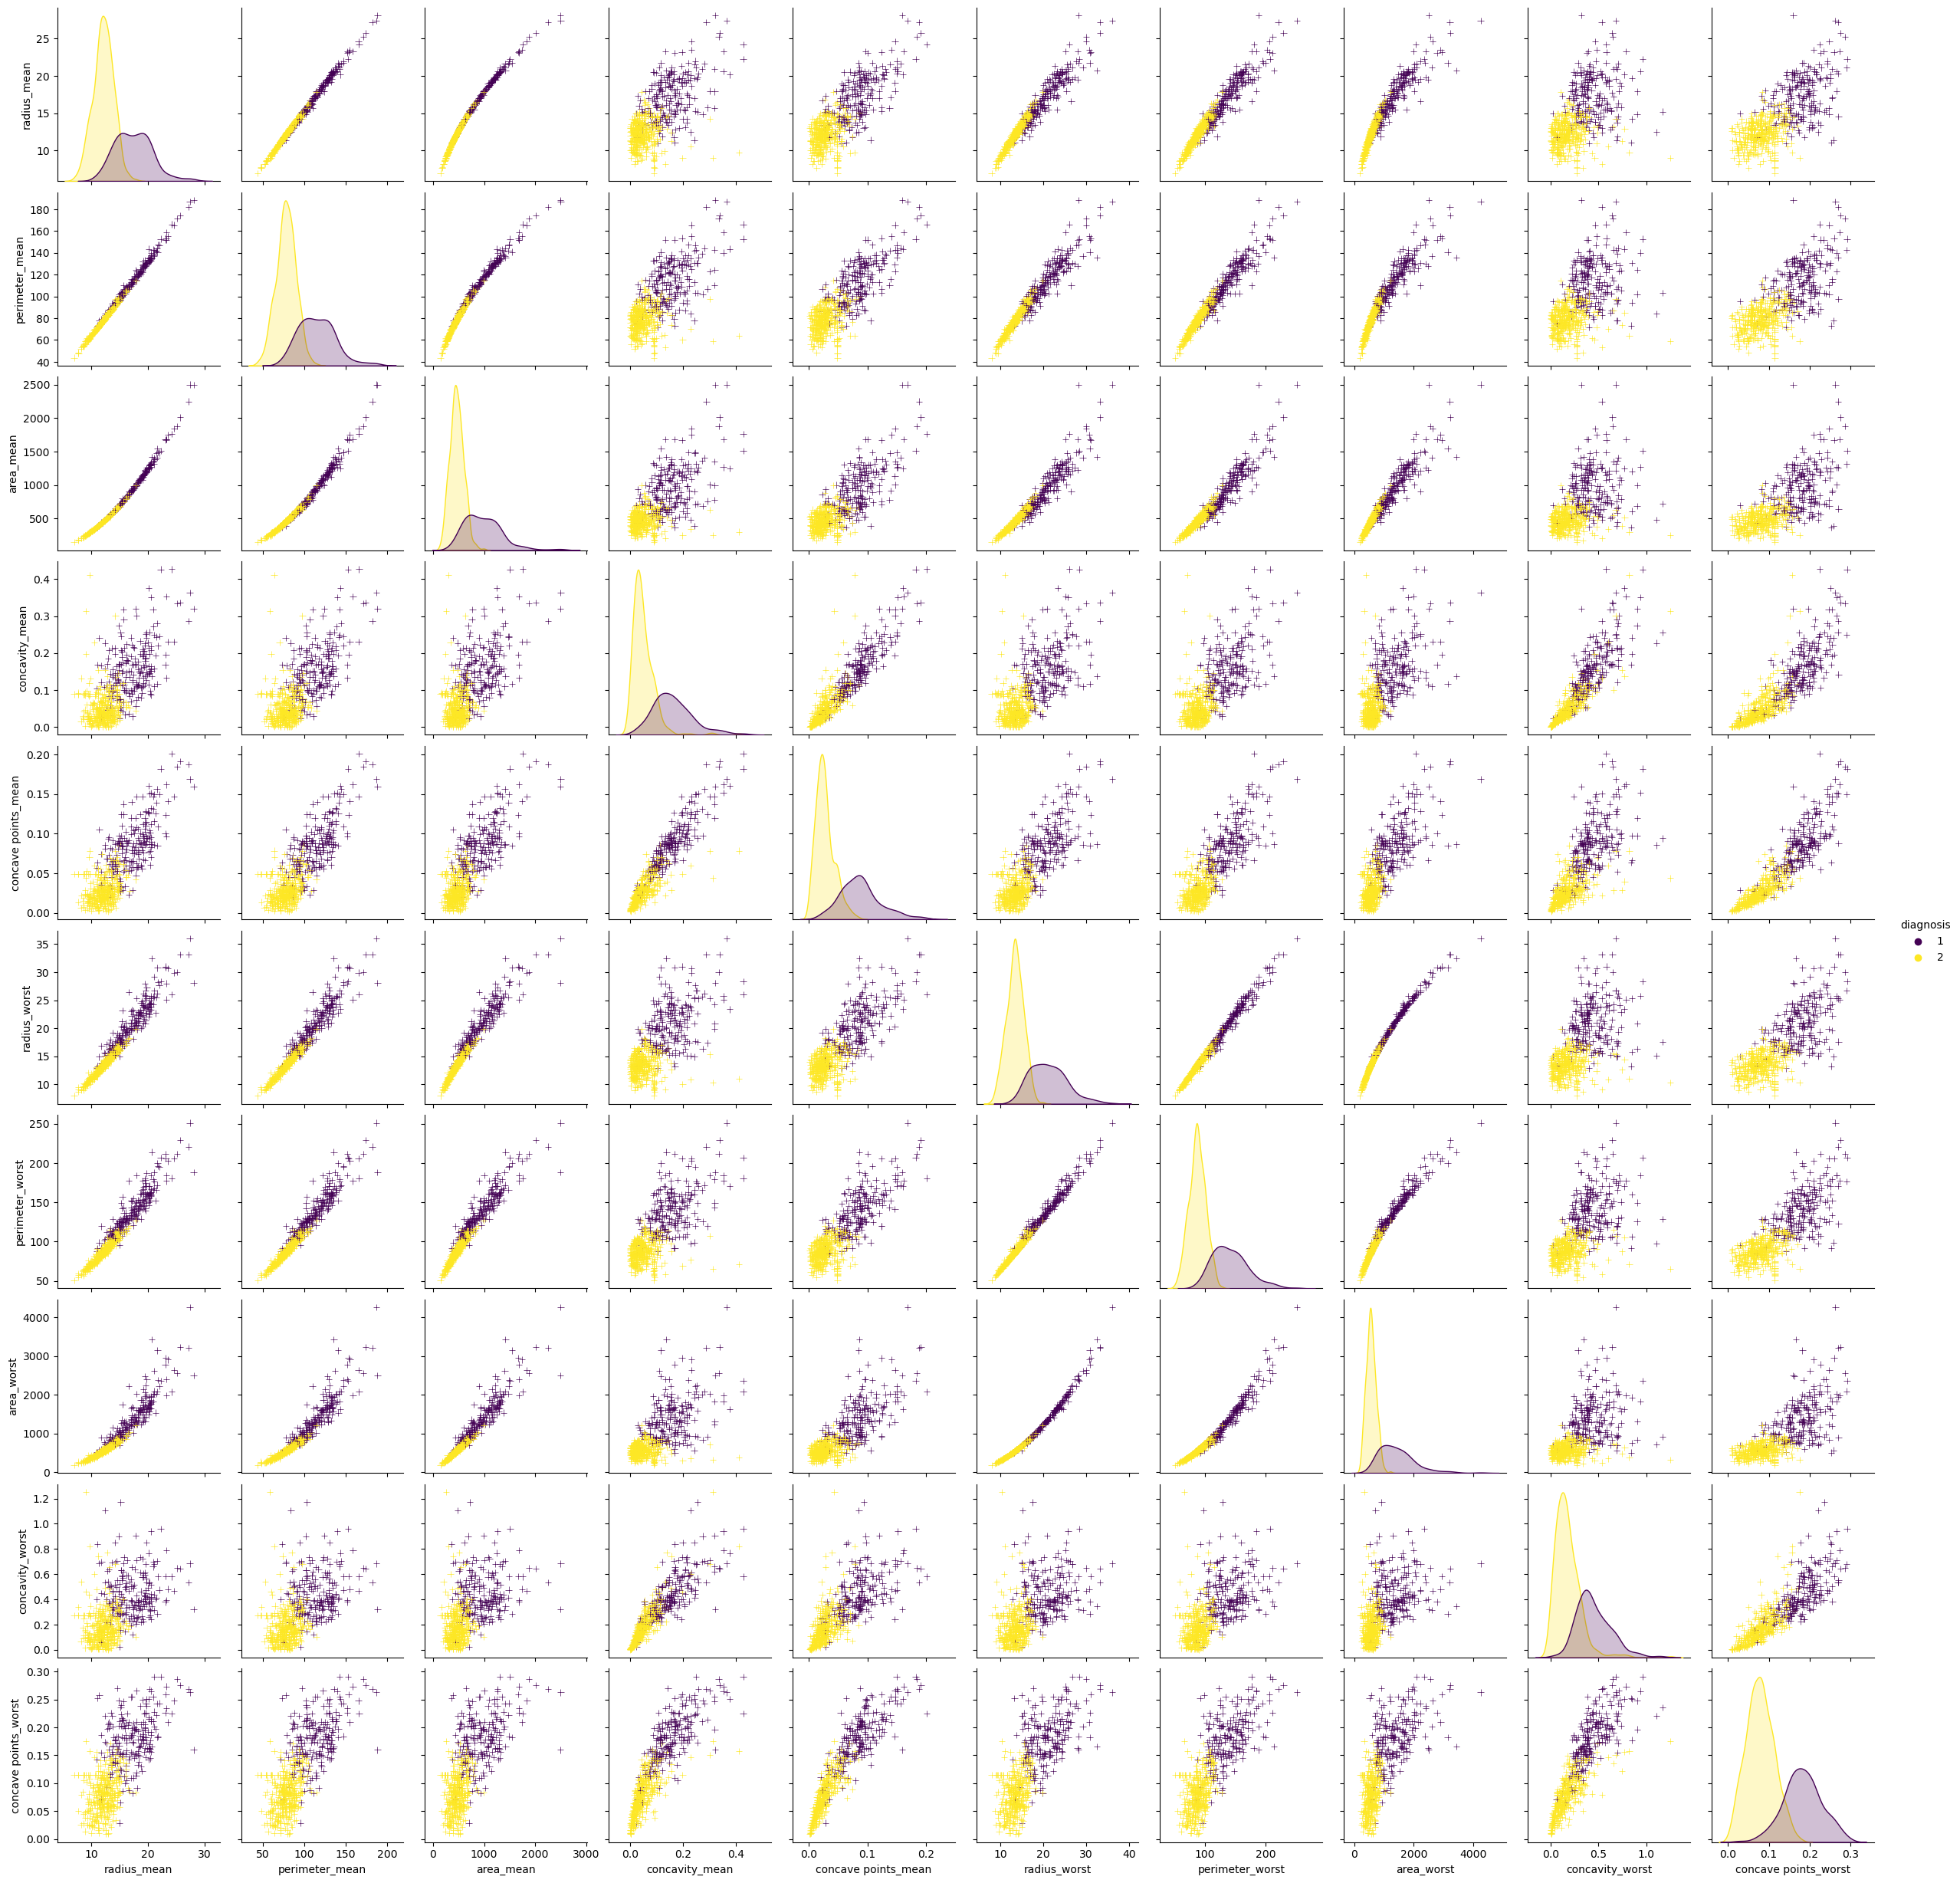

In [30]:

sns.pairplot(df[corr_features], diag_kind = "kde", markers = "+", hue = "diagnosis", palette='viridis')
plt.show() 


# Model Training:

<h2><i>Define Data and Labels:</i></h2>

In [31]:
X = df.drop(['diagnosis'], axis=1)
y = df['diagnosis']

In [32]:
# Normalize the data
# scale the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [33]:
# Split the dataset into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(455, 30)
(114, 30)
(455,)
(114,)


# Model Evaluation:

In [35]:
def train_evaluate_model(model, X_train, y_train, X_test, y_test):
    '''
    Keyword arguments:
    X -- Training data
    y -- Traing labels

    returns a dataframe for evaluating metrics
    '''
   
    model.fit(X_train, y_train)           #fit the model instance 
    
    predictions = model.predict(X_test)        # calculate predictions
    train_pred = model.predict(X_train)

    print("TRAIN CONFUSION MATRIX : \n", confusion_matrix(y_train, train_pred))
    print("\nTRAINING DATA ACCURACY : ",accuracy_score(y_train,train_pred))

    #compute metrics for testing set evaluation
    accuracy = accuracy_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)

    print("\nTEST CONFUSION MATRIX : \n", confusion_matrix(y_test, predictions))
    
    #create a dataframe to visualize the results
    eval_df = pd.DataFrame([[accuracy, f1, precision, recall]], columns=['accuracy', 'f1_score', 'precision', 'recall'])
    return eval_df


<h2>Logistic Regression:</h2>

In [36]:
lg = LogisticRegression()

log = train_evaluate_model(lg, X_train, y_train, X_test, y_test)

TRAIN CONFUSION MATRIX : 
 [[165   4]
 [  2 284]]

TRAINING DATA ACCURACY :  0.9868131868131869

TEST CONFUSION MATRIX : 
 [[42  1]
 [ 0 71]]


In [37]:
log.index = ['LogisticRegression']

In [38]:
log.sort_values(by='f1_score',ascending=False).style.background_gradient(cmap = sns.color_palette("ch:s=-.2,r=.6", as_cmap=True))

<h2>Decision Tree:</h2>

In [39]:
decision_tree = DecisionTreeClassifier()
dectree = train_evaluate_model(decision_tree,X_train, y_train, X_test, y_test)

TRAIN CONFUSION MATRIX : 
 [[169   0]
 [  0 286]]

TRAINING DATA ACCURACY :  1.0

TEST CONFUSION MATRIX : 
 [[40  3]
 [ 3 68]]


In [40]:
dectree.index = ['DecisionTree']

dectree.sort_values(by='f1_score',ascending=False).style.background_gradient(cmap = sns.color_palette("ch:s=-.2,r=.6", as_cmap=True))


<h2>KNearestNeighbors:</h2>

In [41]:
# Create and train the KNN model
KNN = KNeighborsClassifier(n_neighbors=12)

knn = train_evaluate_model(KNN, X_train, y_train, X_test, y_test)

TRAIN CONFUSION MATRIX : 
 [[158  11]
 [  1 285]]

TRAINING DATA ACCURACY :  0.9736263736263736

TEST CONFUSION MATRIX : 
 [[40  3]
 [ 2 69]]


In [42]:
knn.index =['KNearsNeighbors']
knn.sort_values(by='f1_score',ascending=False).style.background_gradient(cmap = sns.color_palette("ch:s=-.2,r=.6", as_cmap=True))


<h2>RandomForestClassifer:</h2>

In [43]:
rfc = RandomForestClassifier()
rf = train_evaluate_model(rfc, X_train, y_train, X_test, y_test)
rf.index = ['RandomForest']

TRAIN CONFUSION MATRIX : 
 [[169   0]
 [  0 286]]

TRAINING DATA ACCURACY :  1.0

TEST CONFUSION MATRIX : 
 [[40  3]
 [ 1 70]]


In [44]:
rf.sort_values(by='f1_score',ascending=False).style.background_gradient(cmap = sns.color_palette("ch:s=-.2,r=.6", as_cmap=True))

<h2>Naive Bayes:</h2>

In [47]:
Naive_Bayes = GaussianNB()
naive = train_evaluate_model(Naive_Bayes, X_train, y_train, X_test, y_test)
naive.index = ['NaiveBayes']

TRAIN CONFUSION MATRIX : 
 [[150  19]
 [ 10 276]]

TRAINING DATA ACCURACY :  0.9362637362637363

TEST CONFUSION MATRIX : 
 [[40  3]
 [ 1 70]]


In [48]:
naive.head(6).sort_values(by='f1_score',ascending=False).style.background_gradient(cmap = sns.color_palette("ch:s=-.2,r=.6", as_cmap=True))

<h2>SVC:</h2>

In [49]:
linear_svm = SVC(kernel='linear', C=1, random_state=0)
lsvm = train_evaluate_model(linear_svm, X_train, y_train, X_test, y_test)
lsvm.index = ['LinearSVM']


TRAIN CONFUSION MATRIX : 
 [[166   3]
 [  2 284]]

TRAINING DATA ACCURACY :  0.989010989010989

TEST CONFUSION MATRIX : 
 [[41  2]
 [ 3 68]]


In [50]:
lsvm.head(6).sort_values(by='f1_score',ascending=False).style.background_gradient(cmap = sns.color_palette("ch:s=-.2,r=.6", as_cmap=True))

<h2>Evaluation:</h2>

In [69]:
key= ['LogisticRegression','DecisionTreeClassifier','KNeighborsClassifier','RandomForestClassifier','GaussianNB','SVC']

value = [LogisticRegression(),DecisionTreeClassifier(),KNeighborsClassifier(n_neighbors=12),RandomForestClassifier(),GaussianNB(), SVC(kernel='linear', C=1, random_state=0)]
models = dict(zip(key,value))

In [70]:
predicted =[]
for name,algo in models.items():
    model=algo
    model.fit(X_train,y_train)
    predict = model.predict(X_test)
    acc = accuracy_score(y_test, predict)
    predicted.append(acc)
    print(name,acc)

LogisticRegression 0.9912280701754386
DecisionTreeClassifier 0.9385964912280702
KNeighborsClassifier 0.956140350877193
RandomForestClassifier 0.9649122807017544
GaussianNB 0.9649122807017544
SVC 0.956140350877193


Text(0.5, 1.0, 'Plotting the Model Accuracies')

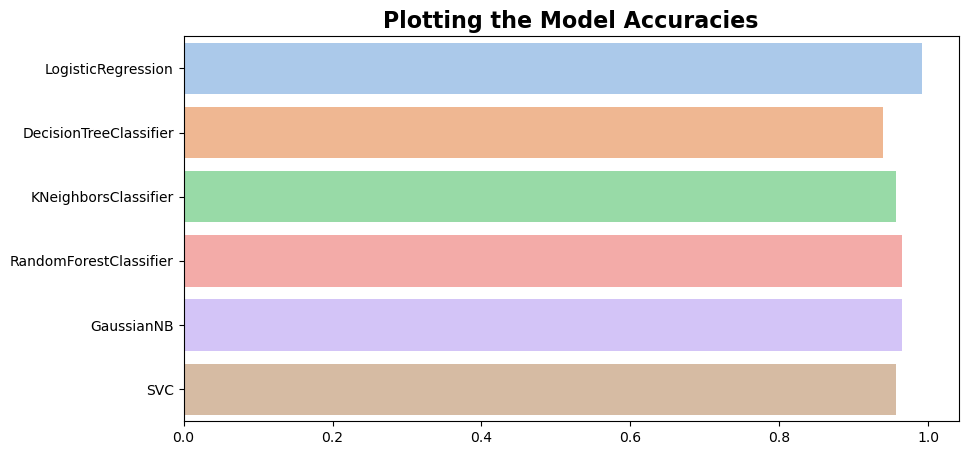

In [71]:
plt.figure(figsize = (10,5))
sns.barplot(x = predicted, y = key, palette='pastel')
plt.title("Plotting the Model Accuracies", fontsize=16, fontweight="bold")

<h2>Making Predictive System:</h2>

In [75]:
input_data = (13.86,16.93,90.96,578.9,0.1026,0.1517,0.09901,0.05602,0.2106,0.06916,0.2563,1.194,1.933,22.69,0.00596,0.03438,0.03909,0.01435,0.01939,0.00456,15.75,26.93,104.4,750.1,0.146,0.437,0.4636,0.1654,0.363,0.1059)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = Naive_Bayes.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 1):
  print('The person is having breast cancer')
else:
  print('The person is not having high chances of breast cancer')


[1]
The person is having breast cancer


In [76]:
input_data = (8.598,20.98,	54.66,	221.8,	0.1243,	0.08963,	0.03,	0.009259,	0.1828,	0.06757,	0.3582,	2.067,	2.493,	18.39,	0.01193,	0.03162,	0.03,	0.009259,	0.03357,	0.003048,	9.565,	27.04,	62.06,	273.9,	0.1639,	0.1698,	0.09001,	0.02778,	0.2972,	0.07712)


# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = Naive_Bayes.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The person is having breast cancer')
else:
  print('The person is not having high chances of breast cancer')


[1]
The person is not having high chances of breast cancer
